In [2]:
#hide
#default_exp viz
#default_cls_lvl 3
from nbdev.showdoc import show_doc

In [4]:
#export
from nbdev.imports import *
# from fastcore.script import *
# from fastcore.foundation import *
# from keyword import iskeyword
# import nbformat

# visualization flow

> How to manage visual assets

In [5]:
show_doc(Config, title_level=3)

<h3 id="Config" class="doc_header"><code>class</code> <code>Config</code><a href="https://github.com/fastai/fastcore/tree/master/fastcore/foundation.py#L250" class="source_link" style="float:right">[source]</a></h3>

> <code>Config</code>(**`cfg_path`**, **`cfg_name`**, **`create`**=*`None`*)

Reading and writing `ConfigParser` ini files

In [41]:
# @seaborn set1  #viz
import seaborn as sns

sns.set(
    style="white",
    palette="muted",
    color_codes=True,
    rc={"figure.figsize": (11.7, 8.27)},
)

In [42]:
# @dataset alta #dw
import pandas as pd

url = (
    "https://github.com/mattharrison/datasets/raw/master/"
    "data/alta-noaa-1980-2019.csv"
)
alta_df = pd.read_csv(url)
dates = pd.to_datetime(alta_df.DATE)
snow = alta_df.SNOW.rename(dates)
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

<AxesSubplot:ylabel='Frequency'>

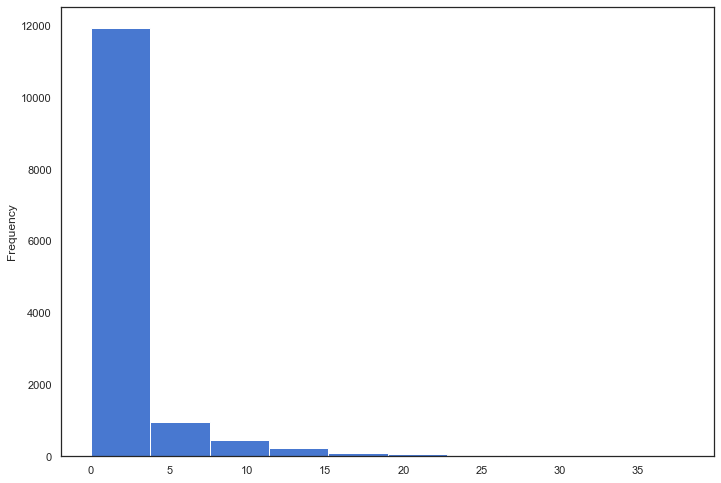

In [50]:
# ! test1.png
snow.plot.hist()

In [9]:
# exporti
from glob import glob
import os
import time
import datetime
import base64
import pandas as pd
from io import BytesIO, StringIO
from PIL import Image
from IPython.core.magic import Magics, magics_class, line_magic, cell_magic
from IPython import display
from sniptool.core import getmtime_ms, get_change_file


def _export_output_image(path, folder='img', show_filename = True):
    if not os.path.exists(folder):
        os.mkdir(folder)
    notebook = json.load(open(path))
    for cell in notebook["cells"]:
        if not cell["source"]:
            continue
        head = cell["source"][0]
        if head.startswith("# !"): # contain images
            if show_filename:
                sys.stdout.write(path)
                sys.stdout.flush()
                show_filename = False
                
            oname = folder + "/" + head.lstrip("# !").strip()
            for output in cell["outputs"]:
                try:
                    img_png = output["data"]["image/png"]
                    im = Image.open(BytesIO(base64.b64decode(img_png)))
                    im.save(oname, "PNG")
                    sys.stdout.write(f"-- {oname} created.\n")
                    sys.stdout.flush()
                    break
                except:
                    pass
    
@magics_class
class AssetMagics(Magics):
    """snip magic for snippets management.
    Provides the %snip magic.
    """
    @line_magic
    def sa(self, line, last="last.txt", this='this.txt'):
        for path in get_change_file('*.ipynb',last, this):
            _export_output_image(path)

    @cell_magic
    def cached_plot(self, line: str, cell: str):
        "cached_plot <>"
        post = '\n'.join(['from matplotlib.pyplot import savefig',f'savefig("{line}")'])
        if os.path.isfile(line): # use cached
            return display.Image(line)
        else: # actual plotting and save to disk
            ip = get_ipython()
            ip.run_cell(cell+post)

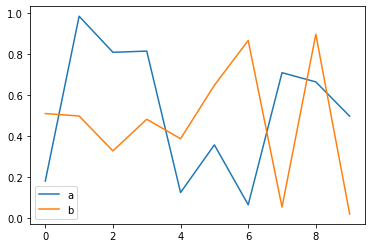

In [25]:
import numpy as np, pandas as pd
a, b = np.random.rand(10), np.random.rand(10)
df = pd.DataFrame(zip(a,b), columns='a b'.split()).plot()

In [50]:
#hide
from IPython.core.magic import register_line_magic, register_cell_magic
from IPython import display
@register_cell_magic
def cached_plot(line: str, cell: str):
    "cached_plot <>"
#     print(cell)
    post = '\n'.join(['from matplotlib.pyplot import savefig',f'savefig("{line}")'])
    if os.path.isfile(line): # use cached
        return display.Image(line)
    else:
        ip = get_ipython()
        ip.run_cell(cell+post)

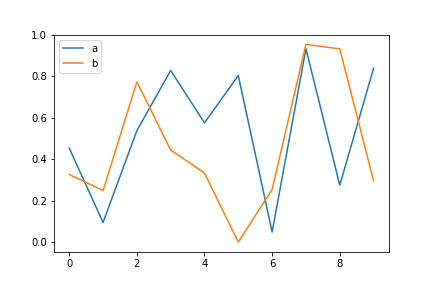

In [7]:
%%cached_plot test.png
import numpy as np, pandas as pd
a, b = np.random.rand(10), np.random.rand(10)
df = pd.DataFrame(zip(a,b), columns='a b'.split()).plot()

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%reload_ext sniptool